# Linear SVC Assignment

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [19]:
data.SchoolRank.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: SchoolRank, dtype: int64

### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [3]:
X = data.drop('Admitted', axis=1)
Y = data.Admitted

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [26]:
svc = SVC(C=10.0, kernel='linear')
svc.fit(X_train, y_train)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
print(f'SVC Train score: {svc.score(X_train, y_train)}')
print(f'SVC Test score: {svc.score(X_test, y_test)}')

SVC Train score: 0.6678571428571428
SVC Test score: 0.5583333333333333


### Choose some other values for C and show the difference between the scores for the train and test sets.

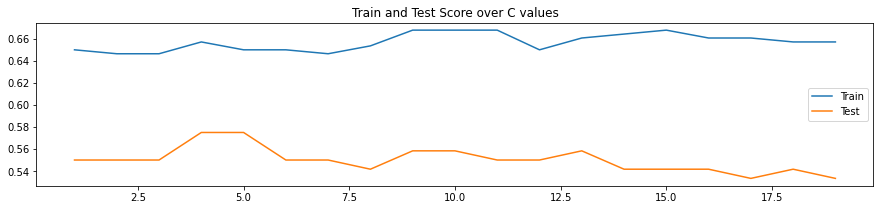

In [29]:
c_vals = np.arange(1,20,1)
train_score = []
test_score = []

for i in c_vals:
    svc = SVC(C=i, kernel='linear')
    svc.fit(X_train, y_train)
    #print(f'\nCurrent: {i}')
    #print(f'SVC Train score: {svc.score(X_train, y_train)}')
    #print(f'SVC Test score: {svc.score(X_test, y_test)}')
    train_score.append(svc.score(X_train, y_train))
    test_score.append(svc.score(X_test, y_test))

plt.figure(figsize=(15,3))
plt.plot(c_vals, train_score, label='Train')
plt.plot(c_vals, test_score, label='Test')
plt.title('Train and Test Score over C values')
plt.legend()
plt.show()

### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [30]:
X = data.drop('SchoolRank', axis=1)
Y = data.SchoolRank

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

svc = SVC(C=52.0, kernel='linear')
svc.fit(X_train, y_train)
print(f'SVC Train score: {svc.score(X_train, y_train)}')
print(f'SVC Test score: {svc.score(X_test, y_test)}')

SVC Train score: 0.6428571428571429
SVC Test score: 0.5833333333333334


### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

In [31]:
y_pred_tr = svc.predict(X_train)
y_pred_te = svc.predict(X_test)

print(f'CM for Train: \n{confusion_matrix(y_train, y_pred_tr)}')
print(f'\nCM for Test: \n{confusion_matrix(y_test, y_pred_te)}\n')
print(classification_report(y_test, y_pred_te))

CM for Train: 
[[13  6  1  0  0]
 [ 5 50 22  2  1]
 [ 0 16 67  5  0]
 [ 1  3 14 24 10]
 [ 0  0  4 10 26]]

CM for Test: 
[[ 2  3  1  0  0]
 [ 5 18  4  0  0]
 [ 0 10 32  3  0]
 [ 0  0  6 10  6]
 [ 0  1  4  7  8]]

              precision    recall  f1-score   support

           1       0.29      0.33      0.31         6
           2       0.56      0.67      0.61        27
           3       0.68      0.71      0.70        45
           4       0.50      0.45      0.48        22
           5       0.57      0.40      0.47        20

    accuracy                           0.58       120
   macro avg       0.52      0.51      0.51       120
weighted avg       0.58      0.58      0.58       120



*There is a lot that is being predicted as 3 on the train confusion matrix due to the majority of entries being 3 for SchoolRank. Even with an optimized C value, the SVC model does not predict SchoolRank at above 60% accuracy, possibly due to having too many dimensions and non-scaled independent variables.*

*That said, its performance is not far off the earlier SVC model for classification.*